### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [73]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [53]:
vehicle_df = pd.read_csv("vehicle.csv").dropna()
vehicle_df.shape

(813, 19)

In [54]:
#All the missing values are dropped - Initial requirement
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [55]:
vehicle_df["class"].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [44]:
#Missing values are dropped in first step as per requirement.

In [56]:
#Dropping target feature/column "class", to make model builing unbiased
vehicle_df.drop(columns="class", inplace=True)
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 18 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 3. Standardize the data 

In [57]:
vehicle_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [62]:
#Quite a few columns are there with high and low unit values
# To make data unit free, normalizing the data
from scipy.stats import zscore
vehicle_df = vehicle_df.apply(zscore)

In [63]:
#Values are standardized
vehicle_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.079822,-0.944703,0.314261,0.413803,0.279250,-0.128151,0.013207,-0.126809,-0.217151,-0.958335,0.373150,-0.093528,-0.781504,-0.053505,0.131793,1.380091,-0.159204,-0.098644
842,-0.565926,0.194828,0.124067,-0.181529,0.530251,0.513657,-0.289256,0.257876,-0.217151,0.766312,-0.493716,-0.401813,0.054092,-0.053505,-1.088104,0.819644,-0.484413,0.171837
843,1.500018,1.497149,1.201833,1.574700,0.655752,0.727593,1.616264,-1.409094,1.727163,1.732113,1.272121,1.613458,0.796844,-0.321192,-0.681472,-0.973784,-0.321809,0.712800
844,-0.930504,-1.433074,-0.256321,-0.687560,-0.473753,-0.342087,-1.015169,1.155476,-0.994877,-1.648193,-1.071626,-0.961293,-0.812452,-0.856567,-1.291420,1.380091,0.166004,-0.098644


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [87]:
distortion = range( 1, 10)

You can later use this array to plot the elbow plot

In [88]:
distortion

range(1, 10)

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [136]:
cluster_errors = []

for num_clusters in distortion:
  clusters = KMeans( num_clusters, random_state = 1) #n_init says how many clusters to start with
  clusters.fit(vehicle_df)
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

In [127]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":distortion, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,15183.800738
1,2,9172.836860
2,3,7038.998496
3,4,5744.134849
4,5,5253.057623
5,6,4833.517991
6,7,4457.233235
7,8,4221.797756
8,9,3924.593910


### 6. Plotting Elbow/ Scree Plot

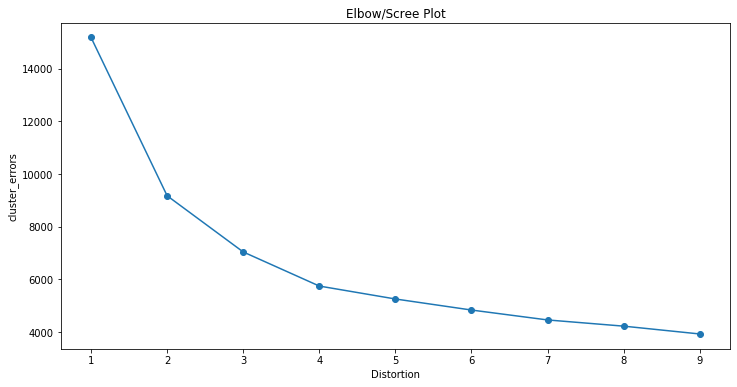

In [128]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.title('Elbow/Scree Plot')
plt.xlabel('Distortion')
plt.ylabel('cluster_errors')
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [ ]:
#From distortion/K-value 4, difference in cluster_errors count is 

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [137]:
#Building model with k value 4
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(vehicle_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [138]:
# Get the centroids
centroids = cluster.cluster_centers_
centroids

array([[-2.13500277e-01, -5.67572972e-01, -2.95628226e-01,
        -1.91022365e-02,  1.91818192e-01, -1.70225098e-01,
        -4.43512774e-01,  3.03183878e-01, -4.73800458e-01,
        -5.31082478e-01, -4.08420378e-01, -4.49349497e-01,
        -5.93030219e-01, -6.52678719e-01, -4.98362181e-02,
         1.18541663e-02,  8.52195044e-01,  7.33987197e-01,
         2.00000000e+00],
       [ 1.15442786e+00,  1.18428647e+00,  1.21198691e+00,
         9.73321772e-01,  9.49213388e-02,  2.18659142e-01,
         1.29796844e+00, -1.21424667e+00,  1.30184458e+00,
         1.09830595e+00,  1.20590258e+00,  1.30898668e+00,
         1.09121291e+00, -1.07878646e-01,  1.68326262e-01,
         2.67954844e-01,  4.67043879e-03,  1.90327006e-01,
         1.00000000e+00],
       [-9.06101420e-01, -5.36093671e-01, -8.81135798e-01,
        -1.07237417e+00, -5.48347532e-01, -2.99127932e-01,
        -7.82915761e-01,  8.68120486e-01, -7.49690067e-01,
        -4.98429173e-01, -8.02269752e-01, -7.85506804e-01,
    

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [139]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(vehicle_df) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,GROUP
0,-0.213500,-0.567573,-0.295628,-0.019102,0.191818,-0.170225,-0.443513,0.303184,-0.473800,-0.531082,-0.408420,-0.449349,-0.593030,-0.652679,-0.049836,0.011854,0.852195,0.733987,2.000000e+00
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327,1.000000e+00
2,-0.906101,-0.536094,-0.881136,-1.072374,-0.548348,-0.299128,-0.782916,0.868120,-0.749690,-0.498429,-0.802270,-0.785507,-0.414229,0.737733,-0.104185,-0.282342,-1.008796,-1.065424,2.886580e-15
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651,5.000000e-01


### Use kmeans.labels_ function to print out the labels of the classes

In [140]:
cluster.labels_

array([0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 3, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 3, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

In [141]:
prediction=cluster.predict(vehicle_df)
vehicle_df["GROUP"] = prediction

In [142]:
vehicle_df.groupby("GROUP").count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
GROUP,,,,,,,,,,,,,,,,,,
0,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
1,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256
2,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249
3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [143]:
#Trying with K value 3
cluster_3 = KMeans( n_clusters = 3, random_state = 1 )
cluster_3.fit(vehicle_df)
centroids_3 = cluster_3.cluster_centers_
centroid_df_3 = pd.DataFrame(centroids_3, columns = list(vehicle_df) )
prediction_3 = cluster_3.predict(vehicle_df)
vehicle_df["GROUP"] = prediction_3
vehicle_df.groupby("GROUP").count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
GROUP,,,,,,,,,,,,,,,,,,
0,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253
1,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260
2,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [183]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [184]:
multi_variate_df = pd.DataFrame(np.concatenate([a,b,c]), columns=['A', 'B'])
multi_variate_df.describe()

,A,B
count,250.000000,250.000000
mean,7.932092,12.081760
std,4.426956,9.976288
min,-4.841078,-7.207520
25%,7.121911,0.777971
50%,9.335716,18.157868
75%,10.892576,20.607376
max,14.885288,23.679827


### 10. Use scatter matrix to print all the 3 distributions

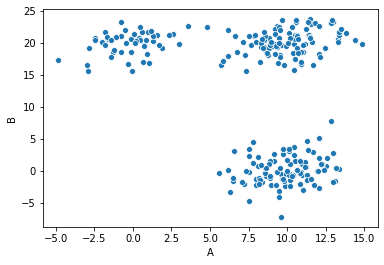

In [185]:
import seaborn as sns
sns.scatterplot(x="A", y= "B", data=multi_variate_df)


### 11. Find out the linkage matrix

In [206]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Use ward as linkage metric and distance as Eucledian

In [188]:
linkage_z = linkage(multi_variate_df, 'ward', metric = 'euclidean')
linkage_z[:2]

array([[1.00000000e+01, 7.50000000e+01, 3.93882486e-02, 2.00000000e+00],
       [3.50000000e+01, 5.60000000e+01, 4.98826426e-02, 2.00000000e+00]])

### 12. Plot the dendrogram for the consolidated dataframe

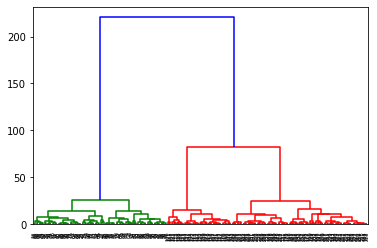

In [189]:
dendrogram(linkage_z)
plt.show()

### 13. Recreate the dendrogram for last 12 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

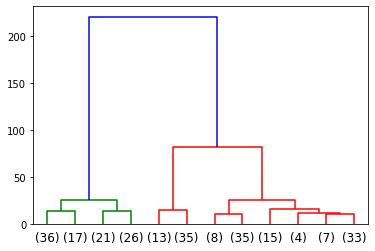

In [205]:
dendrogram(linkage_z, p=12, truncate_mode="lastp")
plt.show()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [220]:
fcluster_z = fcluster(linkage_z, t=3, criterion="distance")
fcluster_z.max()

40

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [233]:
group_count = []
iteration_range = range( 1, 40)
for range_num in iteration_range:
    fcluster_z = fcluster(linkage_z, t=range_num, criterion="distance")
    group_count.append(fcluster_z.max())    #Capture number of cluster

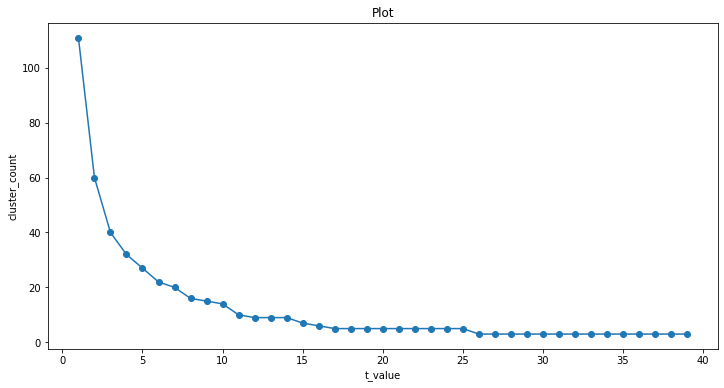

In [234]:
plt.figure(figsize=(12,6))
plt.title('Plot')
plt.xlabel('t_value')
plt.ylabel('cluster_count')
plt.plot( iteration_range, group_count, marker = "o" )

In [232]:
#Plot demonstrates after T value 26 number of cluster is almost same
fcluster_z = fcluster(linkage_z, t=26, criterion="distance")
print("Cluster group count - ", fcluster_z.max())

Cluster group count -  3


### Use matplotlib to visually observe the clusters in 2D space 

In [235]:
multi_variate_df["cluster"] = fcluster_z
multi_variate_df

,A,B,cluster
0,9.159676,1.567515,1
1,7.201444,-2.115951,1
2,8.635024,-0.833226,1
3,7.528994,2.377105,1
4,7.970943,-2.234652,1
...,...,...,...
245,9.794626,16.543332,3
246,13.805879,21.485486,3
247,10.708665,20.666760,3
248,11.013178,19.689710,3


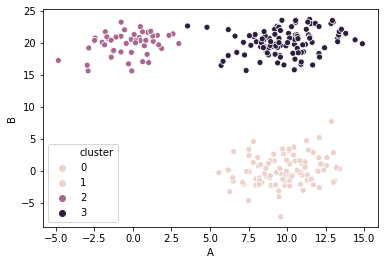

In [237]:
sns.scatterplot(x="A", y= "B", hue="cluster", data=multi_variate_df)